In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

# classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Load Datasets

### Original Dataset

In [518]:
X = df = pd.read_csv(r'./../data/X.csv')
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1


In [519]:
X.shape

(17976, 20)

In [520]:
y = df = pd.read_csv(r'./../data/y.csv')
y.head()

,offer_accepted
0,No
1,No
2,No
3,No
4,No


In [521]:
y_int = pd.Series(y.offer_accepted)
y_int.unique()

array(['No', 'Yes'], dtype=object)

In [522]:
y_int = y_int.apply(lambda x: 0 if x == 'No' else 1)
y_int

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: offer_accepted, Length: 17976, dtype: int64

In [523]:
y_int.value_counts()

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

In [524]:
y_int.unique()

array([0, 1])

### X Variations

In [525]:
X_avgbal = X.drop(columns=(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']))
X_avgbal

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,5,167.50,2,0,0,1,0,1,0,1,0,0,1
17972,1,3,1,3,850.50,2,0,0,1,0,1,0,1,0,0,1
17973,1,2,1,4,1087.25,2,0,0,1,0,1,0,1,0,1,0
17974,1,4,2,2,1022.25,1,1,0,1,0,1,0,1,0,0,1


In [526]:
X_qr = X.drop('average_balance', axis=1)
X_qr

,bank_accounts_open,credit_cards_held,homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,5,136.0,65.0,71.0,398.0,2,0,0,1,0,1,0,1,0,0,1
17972,1,3,1,3,984.0,940.0,943.0,535.0,2,0,0,1,0,1,0,1,0,0,1
17973,1,2,1,4,918.0,767.0,1170.0,1494.0,2,0,0,1,0,1,0,1,0,1,0
17974,1,4,2,2,626.0,983.0,865.0,1615.0,1,1,0,1,0,1,0,1,0,0,1


### SMOTE dataset

In [527]:
smote_data = pd.read_csv(r'./../data/oversampled_data.csv')

In [528]:
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33910 entries, 0 to 33909
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bank_accounts_open        33910 non-null  float64
 1   credit_cards_held         33910 non-null  float64
 2   homes_owned               33910 non-null  float64
 3   household_size            33910 non-null  float64
 4   average_balance           33910 non-null  float64
 5   q1_balance                33910 non-null  float64
 6   q2_balance                33910 non-null  float64
 7   q3_balance                33910 non-null  float64
 8   q4_balance                33910 non-null  float64
 9   income_level              33910 non-null  float64
 10  credit_rating             33910 non-null  float64
 11  reward_Air Miles          33910 non-null  float64
 12  reward_Cash Back          33910 non-null  float64
 13  reward_Points             33910 non-null  float64
 14  mailer

In [529]:
X_sm = smote_data.drop('offer_accepted', axis=1)
X_sm

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,-0.007894,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,0.365992,1.406778,1.171654,-2.006040,-1.383443,-1.399945,-1.216592,-1.143719,-1.144176,0.230839,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744
33906,-0.541352,0.121161,-0.476212,-1.339703,0.509354,-0.090918,1.061438,0.733175,-0.216821,-1.420373,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
33907,-0.541352,-0.742960,-0.476212,-1.345162,0.100980,1.500388,0.608086,-0.670130,-1.245289,-0.445548,-0.850492,-0.711980,1.413683,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352
33908,-0.541352,0.121161,-0.476212,0.207690,0.117587,0.101837,0.098037,-0.168242,0.268133,0.376295,-0.337504,-0.711980,-0.707372,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744


In [530]:
y_sm = smote_data.iloc[:, -1]
y_sm = y_sm.map({'No': 0, 'Yes': 1})
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
33905    1
33906    1
33907    1
33908    1
33909    1
Name: offer_accepted, Length: 33910, dtype: int64

### X-y Split : Original Dataset

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.3, random_state=100)

In [532]:
y_train.value_counts()

offer_accepted
0    11862
1      721
Name: count, dtype: int64

In [533]:
y_test.value_counts()

offer_accepted
0    5093
1     300
Name: count, dtype: int64

### X-y Split : X Variations (For Logistic Regression)

In [534]:
Xavg_train, Xavg_test, yavg_train, yavg_test = train_test_split(X_avgbal, y_int, test_size=0.3, random_state=100) # no quarterly balance
Xqr_train, Xqr_test, yqr_train, yqr_test = train_test_split(X_qr, y_int, test_size=0.3, random_state=100) # no quarterly balance

### X-y Split : SMOTE Dataset

In [535]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [536]:
ysm_train.value_counts()

offer_accepted
1    11926
0    11811
Name: count, dtype: int64

In [537]:
ysm_test.value_counts()

offer_accepted
0    5144
1    5029
Name: count, dtype: int64

## Logistic Regression

In [538]:
def fit_classifier(X, y, model_type):
    '''choose model to apply
    'logistic_b' : classification binomial logistic regression
    'logistic_m' : classification multinomial logistic regression
    'knn' : k nearest neighbor classifier'''
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    if model_type == 'logistic_b':
        model = LogisticRegression(random_state=1, multi_class='ovr')
    elif model_type == 'logistic_m':
        model = LogisticRegression(random_state=1, multi_class='multinomial')
    elif model_type == "knn":
        k = int(input("k="))
        w = str(input("uniform or distance?"))
        model = KNeighborsClassifier(n_neighbors=k, weights=w)
    else:
        None
    
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    summary = pd.DataFrame(np.abs(importance.round(2)), columns=['importance'], index=X.columns)
    summary = summary.sort_values('importance', ascending=False)
    prediction = model.predict(X_test)
    return prediction, summary


In [539]:
log_pred, importance_log = fit_classifier(X, y_int, 'logistic_b')
importance_log

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.95
mailer_type_Letter,0.59
income_level,0.52
reward_Cash Back,0.48
mailer_type_Postcard,0.37
reward_Air Miles,0.26
homes_owned,0.19
bank_accounts_open,0.18
own_your_home_Yes,0.16
overdraft_protection_No,0.15


In [540]:
log_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [541]:
def plot_importance(list):
    plt.figure(figsize=(18,8))
    plt.suptitle('Feature Importance Scores', y=0.95)
    plot = sns.barplot(x = list.importance, y = list.index)
    return plot

<Axes: xlabel='importance'>

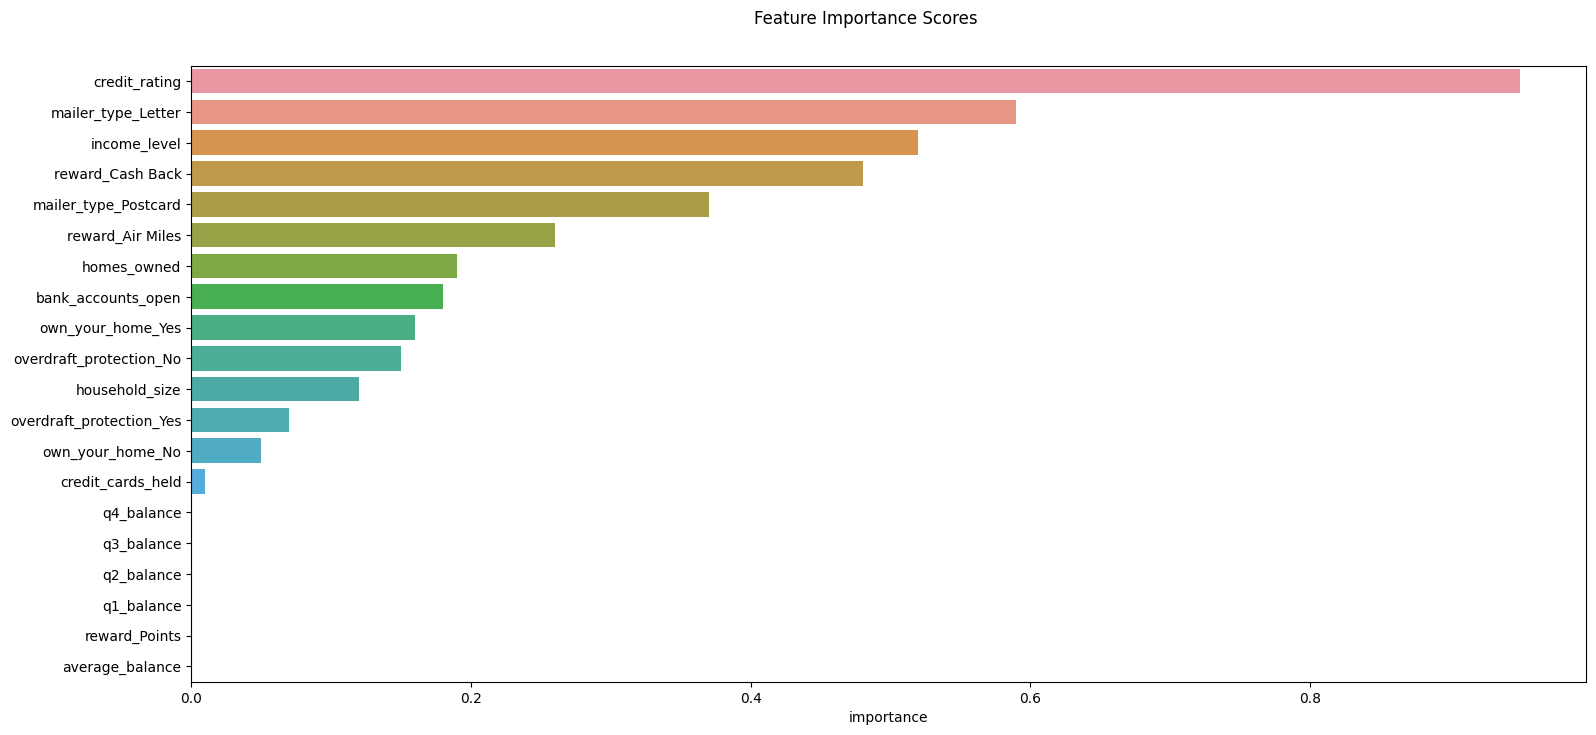

In [542]:
# Logistic Regression Feature Importance Scores
plot_importance(importance_log)

In [543]:
def metrics_class(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc_score = roc_auc_score(actual, predicted)
    
    index = ['Cohen Kappa Score', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC Score']
    metrics = pd.Series([kappa, accuracy, precision, recall, f1, auc_score], index=index)
    return metrics.round(2)


In [544]:
metrics_class(y_test, log_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

#### Logistic Regression with average_balance

In [545]:
log_pred_avg, importance_log_avg = fit_classifier(X_avgbal, y_int, 'logistic_b')
importance_log_avg

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.89
reward_Cash Back,0.63
mailer_type_Letter,0.63
income_level,0.50
mailer_type_Postcard,0.33
reward_Air Miles,0.30
own_your_home_Yes,0.20
overdraft_protection_No,0.18
homes_owned,0.17
bank_accounts_open,0.15


<Axes: xlabel='importance'>

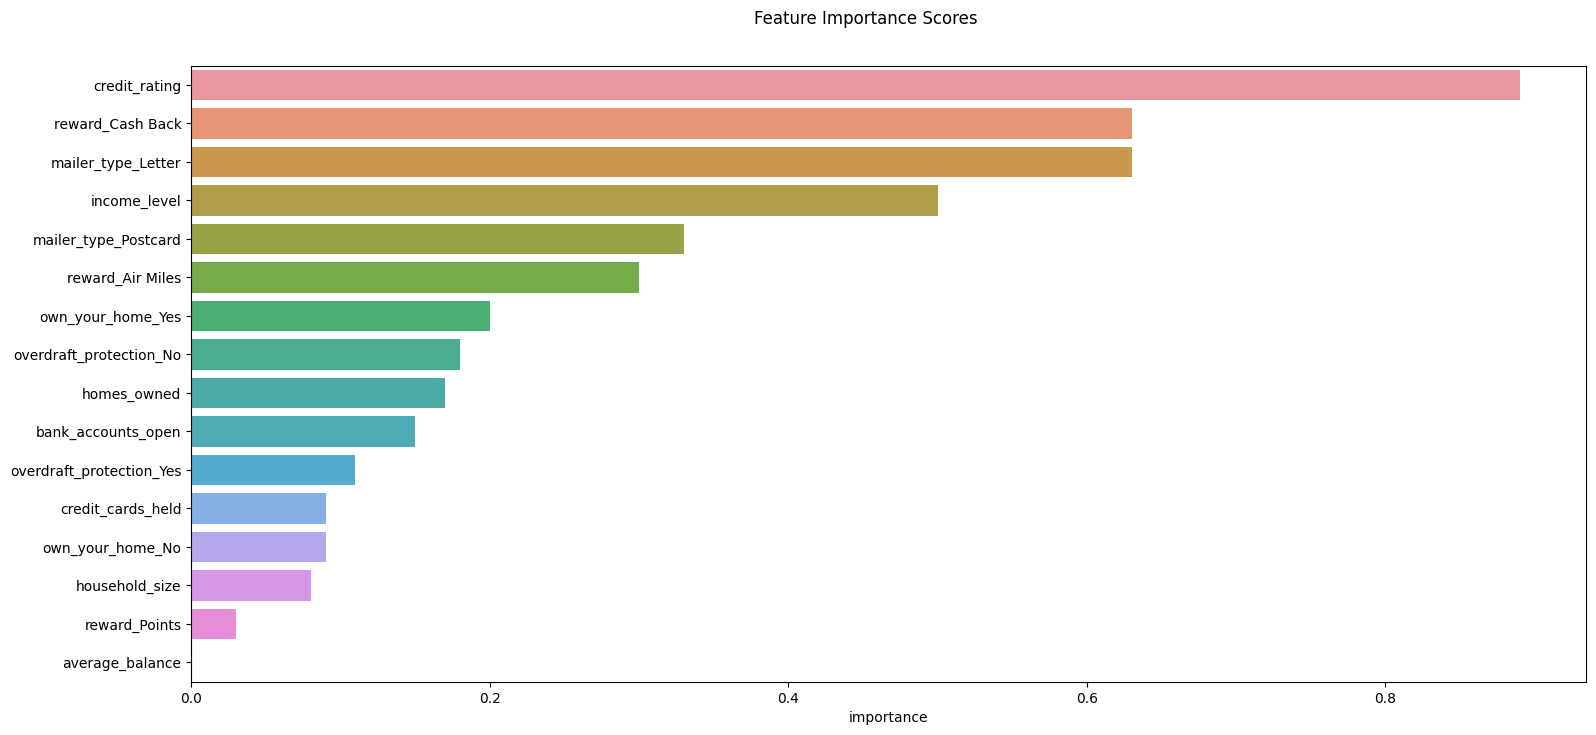

In [546]:
plot_importance(importance_log_avg)

In [547]:
metrics_class(y_test, log_pred_avg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

#### Logistic Regression with quarterly balance

In [548]:
log_pred_qr, importance_log_qr = fit_classifier(X_qr, y_int, 'logistic_b')
importance_log_qr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.93
mailer_type_Letter,0.58
income_level,0.51
reward_Cash Back,0.51
mailer_type_Postcard,0.34
reward_Air Miles,0.26
homes_owned,0.18
bank_accounts_open,0.17
own_your_home_Yes,0.17
overdraft_protection_No,0.16


<Axes: xlabel='importance'>

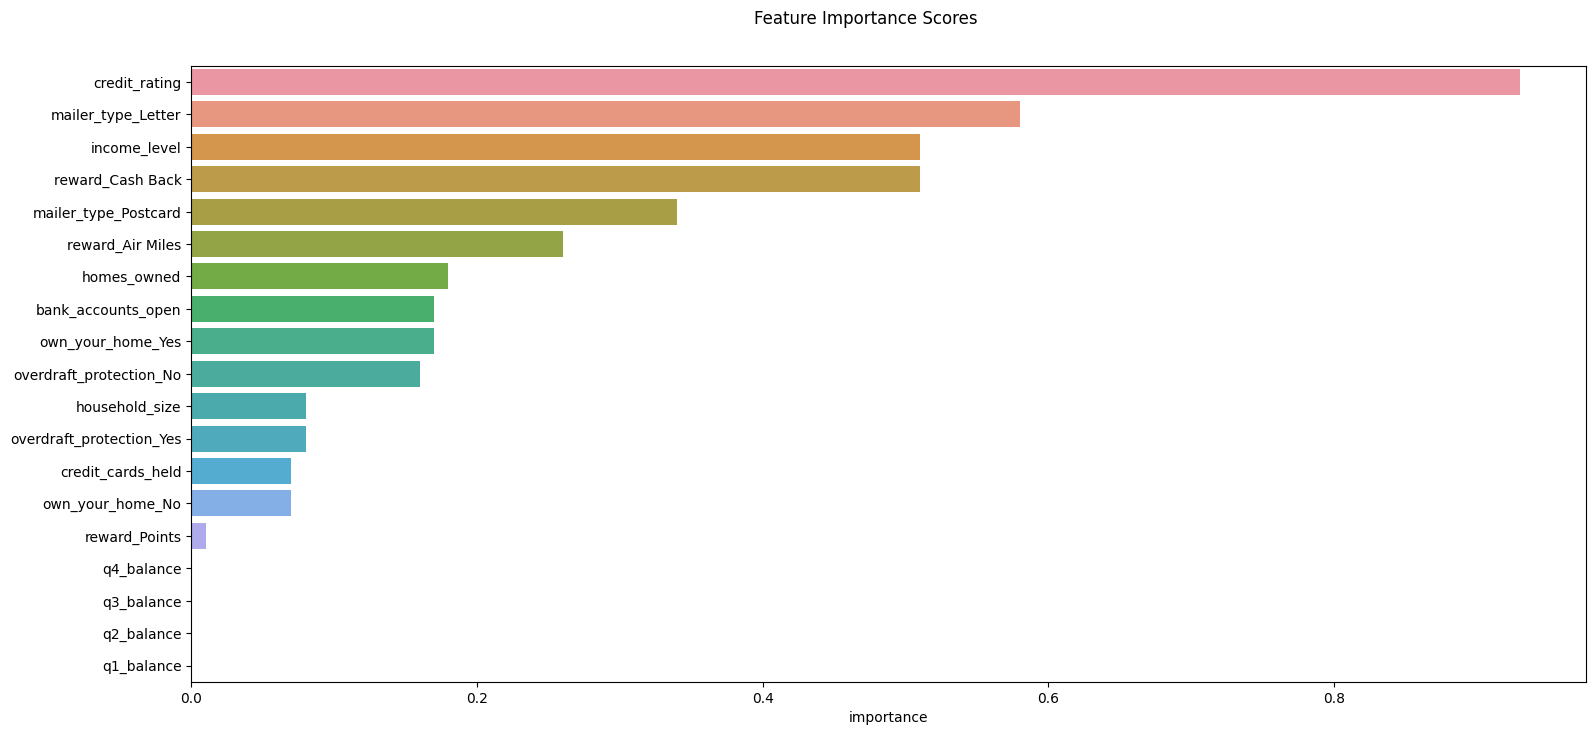

In [549]:
plot_importance(importance_log_qr)

In [550]:
metrics_class(y_test, log_pred_qr)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

#### Logistic Regression with SMOTE

In [551]:
sm_log_pred, sm_importance_log = fit_classifier(X_sm, y_sm, 'logistic_b')
sm_importance_log

,importance
credit_rating,0.90
income_level,0.47
reward_Cash Back,0.32
reward_Air Miles,0.26
mailer_type_Postcard,0.25
mailer_type_Letter,0.25
q1_balance,0.12
bank_accounts_open,0.07
q2_balance,0.07
reward_Points,0.06


In [552]:
metrics_class(ysm_test, sm_log_pred)

Cohen Kappa Score    0.41
Accuracy             0.70
Precision            0.68
Recall               0.74
F1                   0.71
AUC Score            0.70
dtype: float64

<Axes: xlabel='importance'>

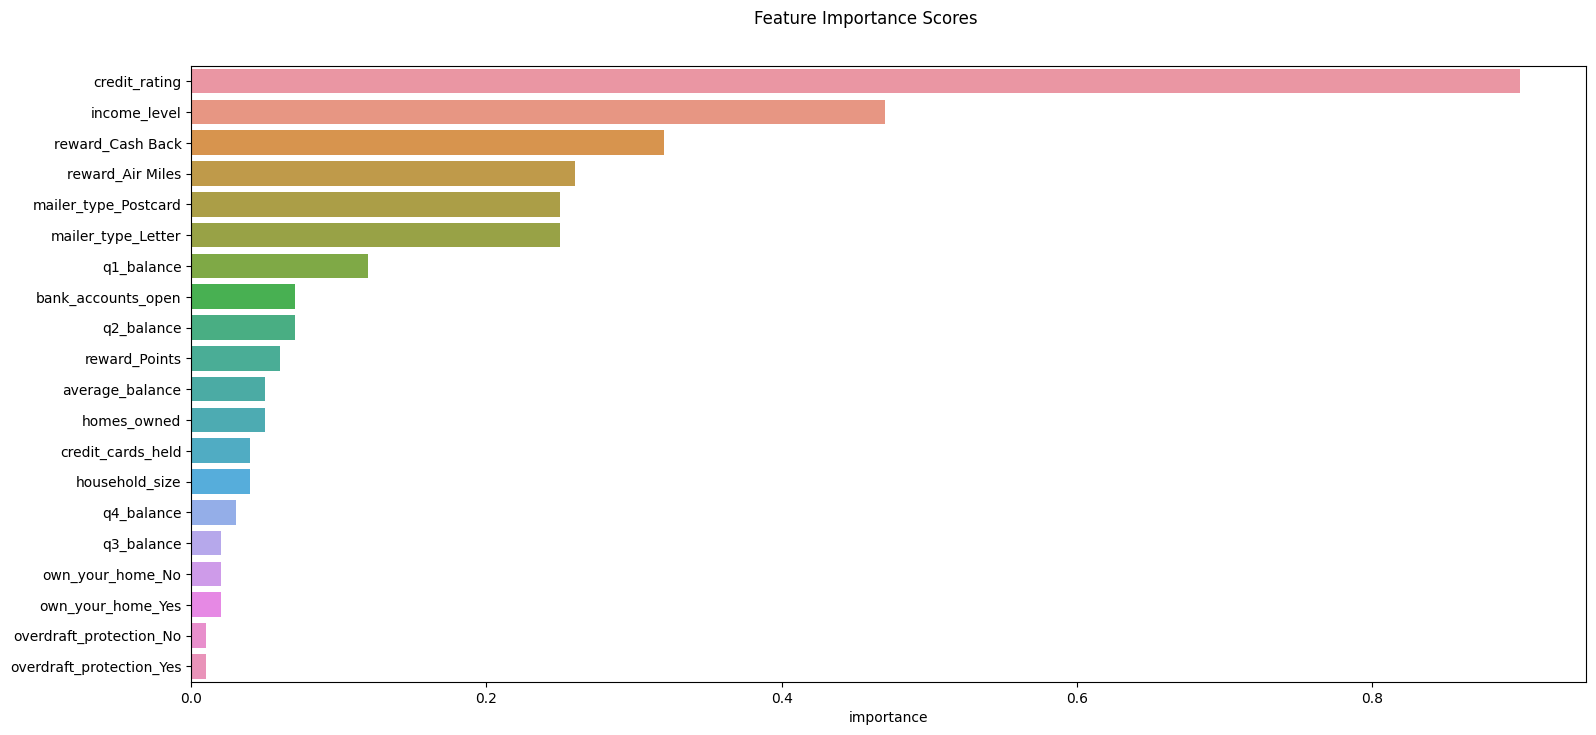

In [553]:
plot_importance(sm_importance_log)

### Decision Tree Classifier Model

In [554]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [555]:
metrics_class(y_test, dt_pred)

Cohen Kappa Score    0.06
Accuracy             0.90
Precision            0.11
Recall               0.12
F1                   0.12
AUC Score            0.53
dtype: float64

In [556]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
dt_entropy_pred = dt_entropy.predict(X_test)

In [557]:
metrics_class(y_test, dt_entropy_pred)

Cohen Kappa Score    0.05
Accuracy             0.89
Precision            0.10
Recall               0.12
F1                   0.11
AUC Score            0.53
dtype: float64

In [558]:
def importance(model):
    importances = pd.DataFrame(data=model.feature_importances_, columns=['importance'],
                        index= X_train.columns)
    importances_sorted = importances.sort_values('importance', ascending=False).round(3)
    return importances_sorted

In [559]:
importance_dt = importance(dt)
importance_dt

,importance
q4_balance,0.164
q1_balance,0.160
q2_balance,0.151
q3_balance,0.150
average_balance,0.130
household_size,0.057
credit_cards_held,0.025
income_level,0.025
credit_rating,0.024
bank_accounts_open,0.018


<Axes: xlabel='importance'>

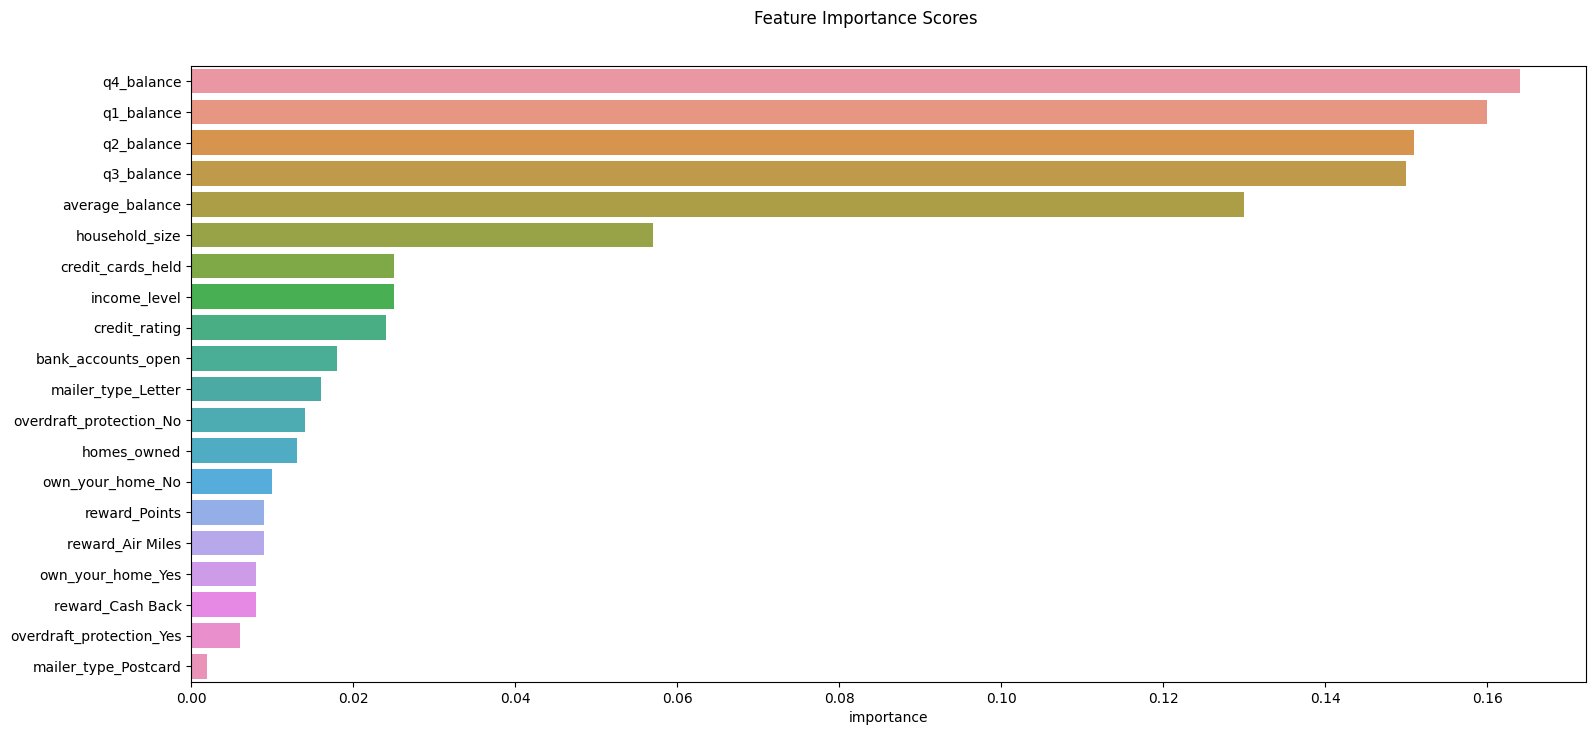

In [560]:
plot_importance(importance_dt)

In [561]:
imp_dt_ent = importance(dt_entropy)
imp_dt_ent

,importance
q4_balance,0.170
average_balance,0.143
q2_balance,0.140
q3_balance,0.140
q1_balance,0.136
credit_rating,0.055
household_size,0.050
credit_cards_held,0.026
income_level,0.025
reward_Cash Back,0.021


<Axes: xlabel='importance'>

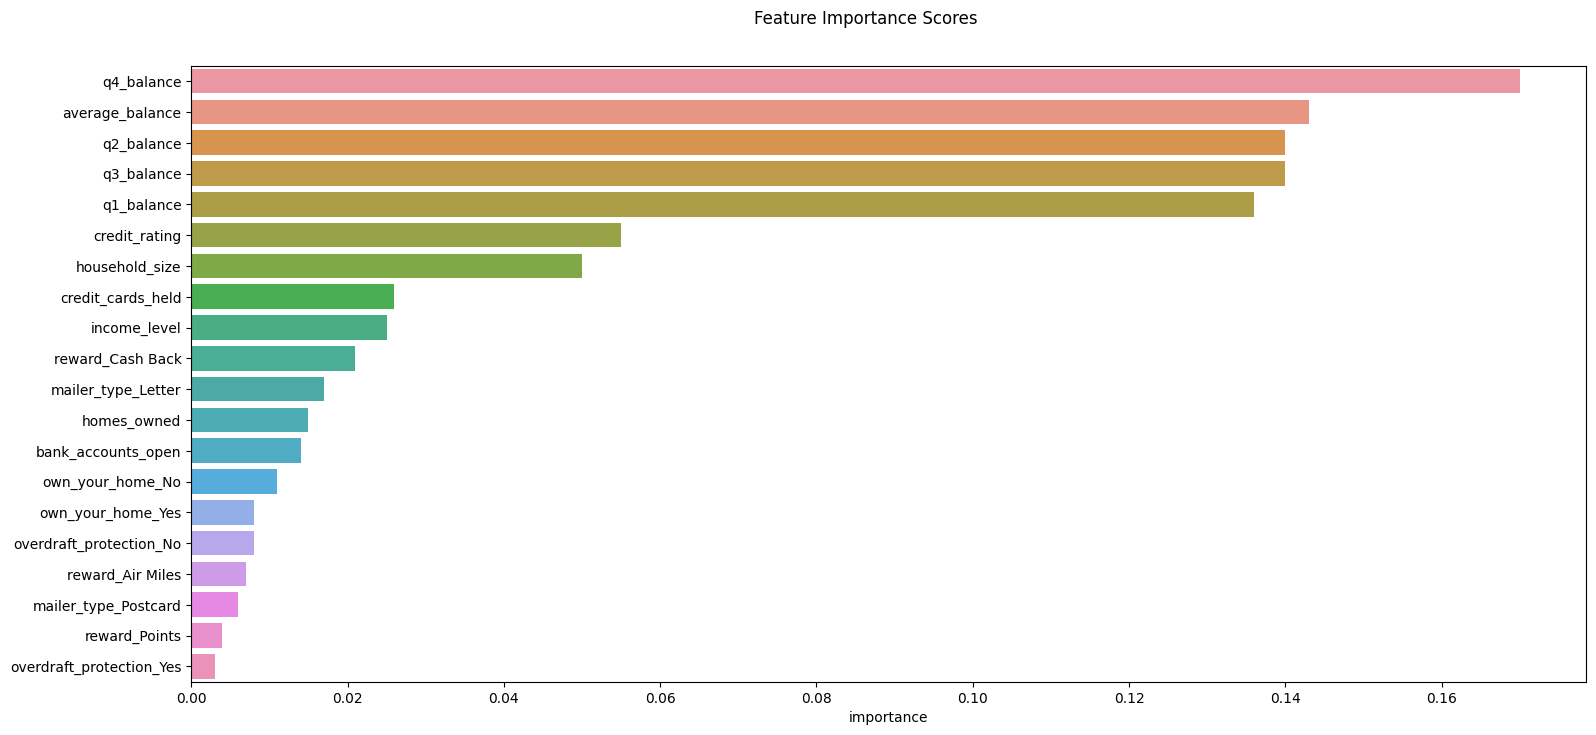

In [562]:
plot_importance(imp_dt_ent)

#### With SMOTE Dataset

In [563]:
dt.fit(Xsm_train, ysm_train)
sm_dt_pred = dt.predict(Xsm_test)

In [564]:
metrics_class(ysm_test, sm_dt_pred)

Cohen Kappa Score    0.85
Accuracy             0.92
Precision            0.91
Recall               0.93
F1                   0.92
AUC Score            0.92
dtype: float64

In [565]:
dt_entropy.fit(Xsm_train, ysm_train)
sm_dt_entropy_pred = dt_entropy.predict(Xsm_test)

In [566]:
metrics_class(ysm_test, sm_dt_entropy_pred)

Cohen Kappa Score    0.86
Accuracy             0.93
Precision            0.92
Recall               0.94
F1                   0.93
AUC Score            0.93
dtype: float64

### Random Forest Classifier

In [567]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [568]:
metrics_class(y_test, rf_pred)

Cohen Kappa Score   -0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

In [569]:
imp_rf = importance(rf)
imp_rf

,importance
q2_balance,0.145
average_balance,0.143
q1_balance,0.141
q3_balance,0.140
q4_balance,0.139
household_size,0.058
credit_rating,0.038
credit_cards_held,0.037
income_level,0.029
bank_accounts_open,0.020


<Axes: xlabel='importance'>

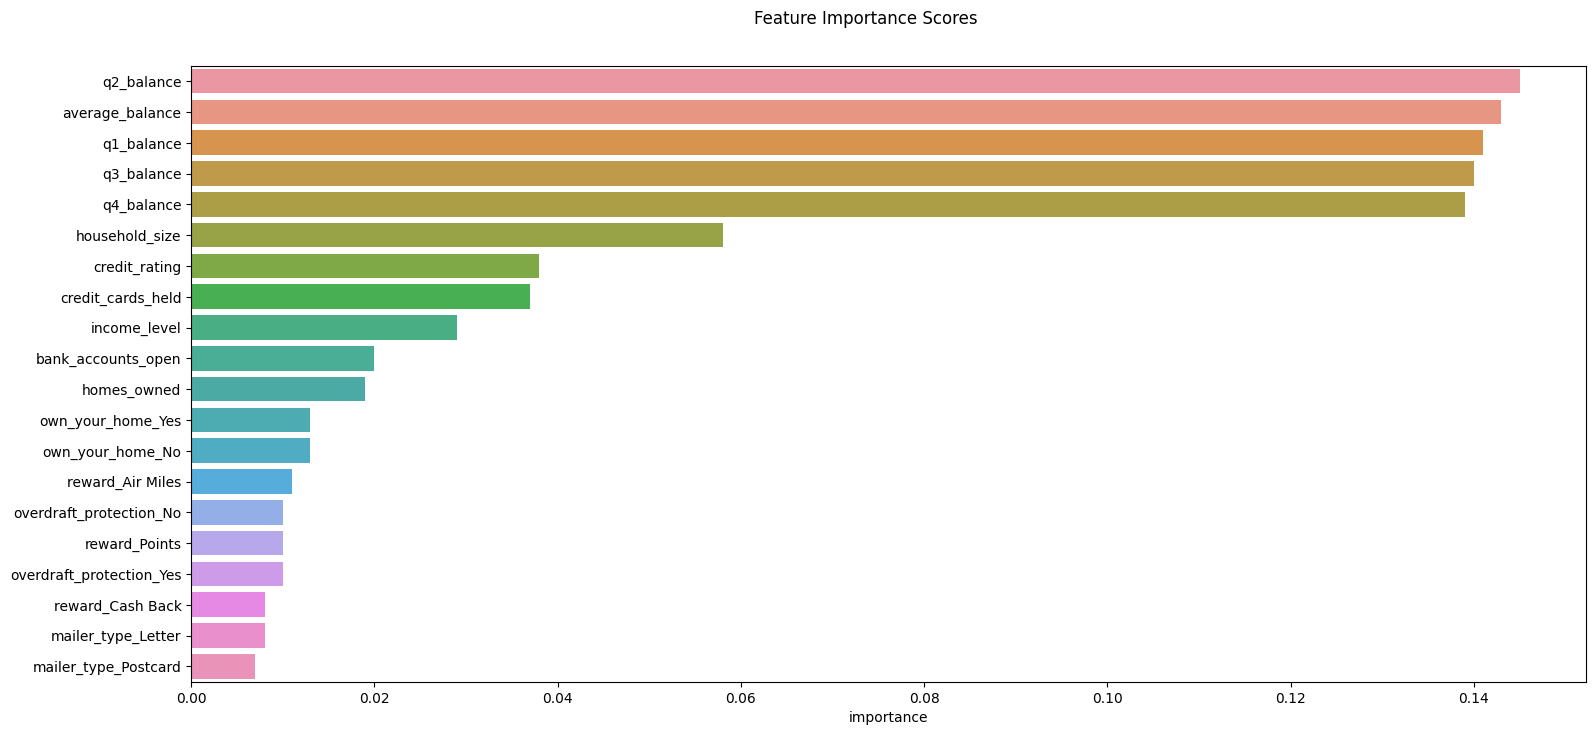

In [570]:
plot_importance(imp_rf)

#### With SMOTE Dataset

In [571]:
rf.fit(Xsm_train,ysm_train)
sm_rf_pred = rf.predict(Xsm_test)

In [572]:
metrics_class(ysm_test, sm_rf_pred)

Cohen Kappa Score    0.94
Accuracy             0.97
Precision            0.98
Recall               0.96
F1                   0.97
AUC Score            0.97
dtype: float64

In [573]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dt_entropy_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, rf_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

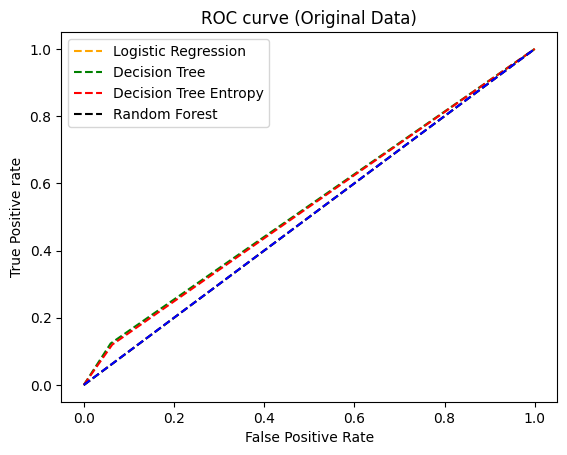

In [574]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Entropy')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve (Original Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_original',dpi=300)
plt.show();

In [575]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ysm_test, sm_log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ysm_test, sm_dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(ysm_test, sm_dt_entropy_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(ysm_test, sm_rf_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

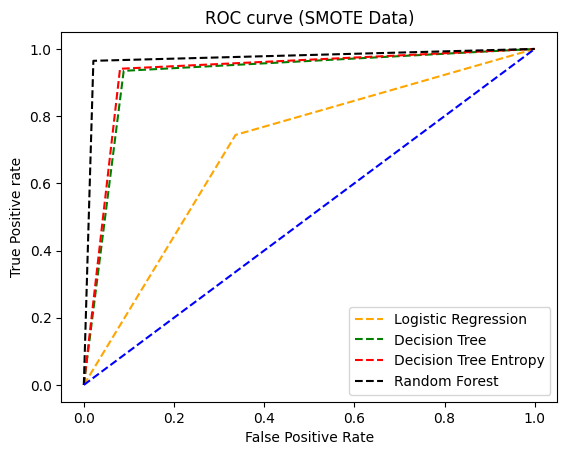

In [577]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Entropy')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve (SMOTE Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_smotedata',dpi=300)
plt.show();